# <span style="color:red">Bank Marketing Dataset </span>

<h1><center>The datasets Columns and their content</center></h1>

| Column Name | Description of Content | Type | Content |
| :-: |:-: | :-: | :-: |
|age	| The age of the Customer | int64 | {59, 56, 41, ...}|
|job | The Customer's Job | object | {admin, technician, ...}|
|marital | The Customer's marital status | object | {divorced, married, single, unknown}|
|education | The Customer's education level | object | {primary, secondary, tertiary, unknown}|
|default | If the Customer already have a loan | object | {no, yes}|
|balance | The Customer's individual balance | int64 | {0, 1265, 37, 854, ...}|
|housing | If the customer have a home loan | object | {no, yes}|
|loan | If the customer have a personal loan | object | {no, yes} |
|contact | The Customer's contact type | object | {cellular, telephone, unknown}|
|day | the day of the month that they last made contact (date) | int64 | {1, 2, ..., 31}|
|month | the month that they last made contact (date) | object | {jan, ..., dec}|
|duration | The duration of the last contact with the customers | int64 | {635, 625, 1399, ...}|
|campaign | The number of contacts made during this campaign | int64 | {1, 2, 3, ...}|
|pdays|the number of days since the last contact for a previous compaign|int64| {-1, ...}(-1=no contact in the last campaign)|
|previous | The number of contacts made for the previous campaign | int64 | {0, 1, ...}|
|poutcome | The result of the previous campaign	| object | {no, yes}|
|deposit | If the customer did get a loan | object | {no, yes}|

**This dataset represents the marketing results of the last marketing campaign and the data of the current compaigns our goal is to analyze the last marketing campaign the bank made and identify the patterns to find the best future strategies to make better results in the banks marketing campaigns.

### Importing the needed libraries 

In [50]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
sns.set_theme(style="whitegrid")
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier \
                            ,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn import svm
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve

### Loading the dataset 

In [51]:
df= pd.read_csv(r'D:\AI_Project\bank.csv')
df  

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


### Exploring the dataset 

checking for missing values. 
**=> There are no empty values

In [3]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


**the marital state of the customers can be divorced, married, or single.
the education levels of the customers are promary, secondary, tertiary, or could be unknown.
the outcome of the previous compaigns for the customer could be failure, othern success or unknown.

In [4]:
print(df.groupby('marital').size())
print(df.groupby('education').size())
print(df.groupby('poutcome').size())

marital
divorced    1293
married     6351
single      3518
dtype: int64
education
primary      1500
secondary    5476
tertiary     3689
unknown       497
dtype: int64
poutcome
failure    1228
other       537
success    1071
unknown    8326
dtype: int64


**We can see that the age of youngest customer is 18 and the oldest customer si 95.
The standard deviation is a number that describes how spread out the values are and the std of the Balance is High which means that the values are spread out over a wider range => thus not as reliable.

In [86]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### DATA VISUALIZATION

this box plot shows the min age which is below 20 and the max age which is above 90. the box starts from the first quartile, 
which is a little above 30, and ends at the third quartile that is between 40 and 50. the orange line in the box is the median 
which is between 30 and 40.

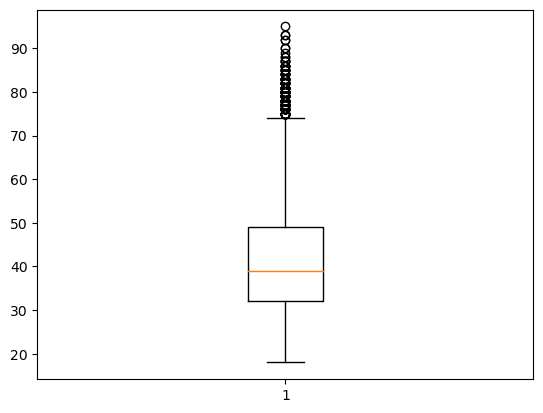

In [11]:
plt.boxplot(df['age'])
plt.show()

the boxplot for the balance shows a lot of outliers.

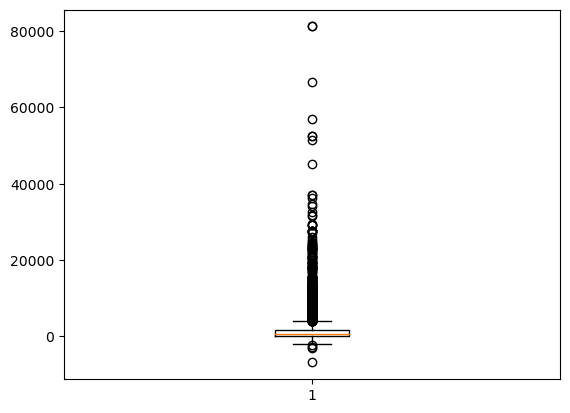

In [12]:
plt.boxplot(df['balance'])
plt.show()

**Most of the married customers didn't make a deposit, the same thing applies to the divorced customers.

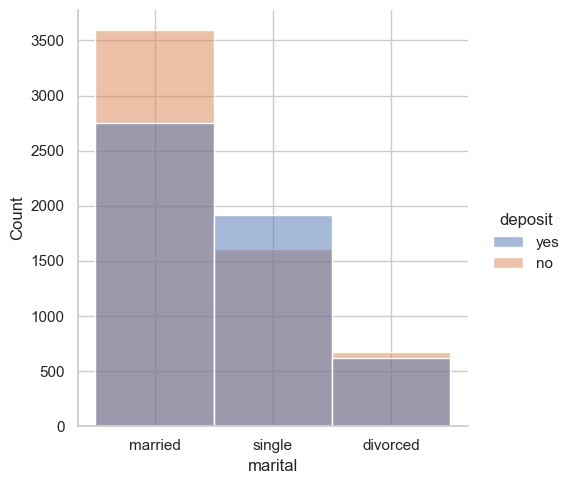

In [3]:
sns.displot(df, x="marital", hue="deposit")

Convert admitted variable into numerical

In [4]:
df["default"]=df["default"].map({"yes": 1, "No": 0})
df["housing"]=df["housing"].map({"Yes": 1, "No": 0})
df["loan"]=df["loan"].map({"Yes": 1, "No": 0})
df["deposit"]=df["deposit"].map({"Yes": 1, "No": 0})

**The number of failed previous campaigns are more than the successful ones.
unknown results are important 

<AxesSubplot:xlabel='poutcome', ylabel='count'>

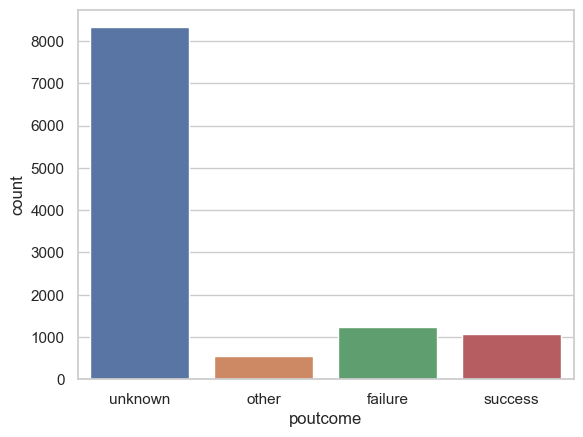

In [4]:
sns.countplot(x=df["poutcome"])

**The previous campaigns were more successful with the customers who work in managment.

<AxesSubplot:xlabel='count', ylabel='job'>

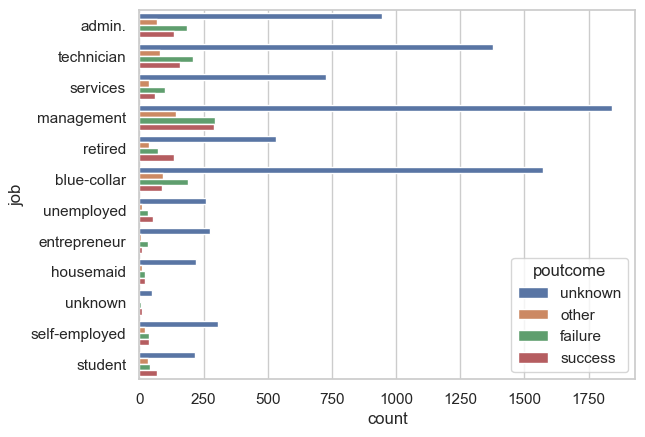

In [40]:
sns.countplot(data=df, y="job", hue="poutcome")

Converting "deposit" into int type so it can be shown in the heat map

In [52]:
df['deposit'] = LabelEncoder().fit_transform(df['deposit'])

**According to our needs the variable that we need to ameliorate is deposit and to do so, according to our heat map, we need to study the variables pdays and previous.

creating a mask variable to mask the correlation between teh same columns (exp: age & age, or balance & balance), and therefore making the correlation map more efficient.
**There is a strong correlation between previous & pdays.
**There is another strong correlation between deposit & duration.

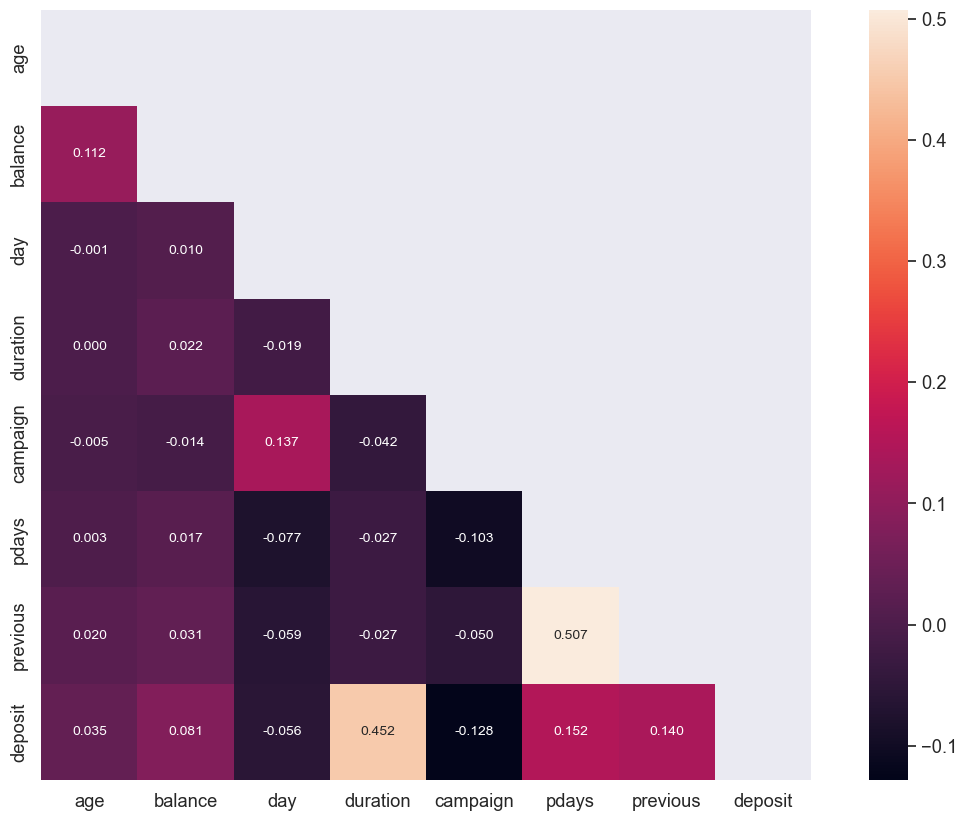

In [53]:
sns.set(font_scale=1.2)
cor = df.corr()
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(cor, mask=mask, square=True,annot=True, annot_kws = {'size':10},fmt='.3f')

Visualizing the relation between previous and pdays.

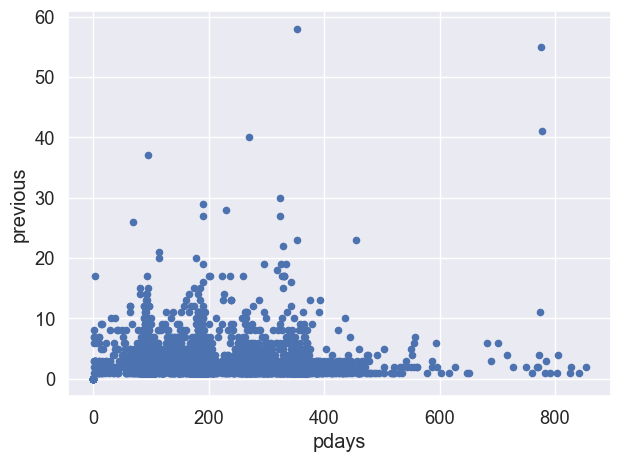

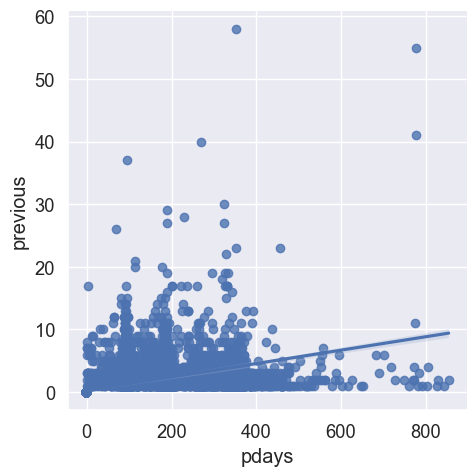

In [6]:
df.plot.scatter(y='previous', x='pdays', marker='o', figsize=(7,5))
sns.lmplot(x="pdays", y="previous", data=df);

make the scale smaller in x, 
**it won't change 

<Figure size 700x200 with 0 Axes>

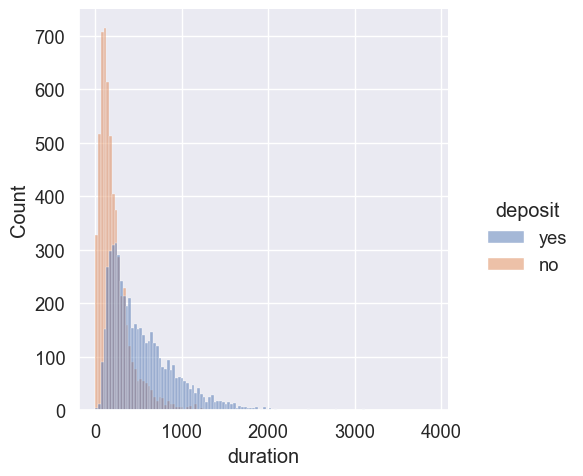

In [15]:
plt.figure(figsize=(7,2))
sns.displot(df, x="duration", hue="deposit")

**The average duration of contact between the customer and the bank is around 372sec which is about 6,2min.
**2975 of these contacts that are above that average duration resulted in the customer making a deposit.

In [9]:
avgDuration = df['duration'].mean()
print(avgDuration)
df['duration_status'] = np.select([(df['duration']< avgDuration)], ["Below Average"],default="Above Average")
pd.crosstab(df['duration_status'], df['deposit'])

371.99381831213043


deposit,0,1
duration_status,,
Above Average,870,2975
Below Average,5003,2314


### Evaluating Algorithms and choosing the most accurate 

Splitting the dataset into testing and training sets"pdays" & "previous"

In [54]:
x = df[['pdays']]
y = df['previous']
X_train, X_test, y_train, y_test = train_test_split(
 x, y, test_size=0.33, random_state=42)
train_test_split(y, shuffle=False)

[0       0
 1       0
 2       0
 3       0
 4       0
        ..
 8366    0
 8367    0
 8368    0
 8369    0
 8370    0
 Name: previous, Length: 8371, dtype: int64,
 8371     0
 8372     0
 8373     0
 8374     0
 8375     0
         ..
 11157    0
 11158    0
 11159    0
 11160    5
 11161    0
 Name: previous, Length: 2791, dtype: int64]

**=>the logistic regression has the highest accuracy score which is approximately 82%. So it is the algorithm that we are going to use.

In [55]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


LR: 0.829634 (0.000623)
LDA: 0.800479 (0.005694)


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


KNN: 0.815056 (0.007409)
CART: 0.817999 (0.004074)
NB: 0.827494 (0.001877)


D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


SVM: 0.820407 (0.005691)


the boxplot visualization of the scores of the algorithms.
**=> the lowest score belongs to the LDA.

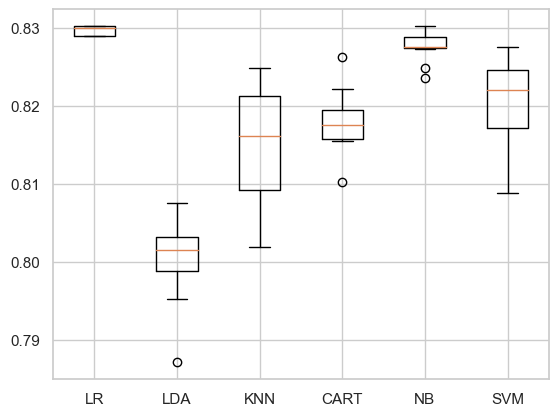

In [48]:
pyplot.boxplot(results, labels=names)
pyplot.show()

Fitting the model on the training datase then printing it's accuracy score, confusion matrix and classification report.
**=> the accracy is about 81%, 

In [57]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8159609120521173
[[2707    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   0  299    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   0  255    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   1  144    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   0   80    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   0   53    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   0   42    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0]
 [   1   23    0    0    0    0    0

D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
